# Max-Cut Sample


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import dwave_networkx as dnx
import dimod

### Helper Functions

In [2]:
def draw_graph(G,cut,pos):
    colors = [ 'g' if n in cut else 'r' for n in G.nodes() ]
    nx.draw(G,with_labels=True,alpha=0.6,node_size=300,node_color=colors,pos=pos)
    
def cut_size(G,cut):
    edges = 0
    for c in cut:
        for n in G.neighbors(c):
            if n not in cut:
                edges += 1
    return edges
    


## Problem as Graph

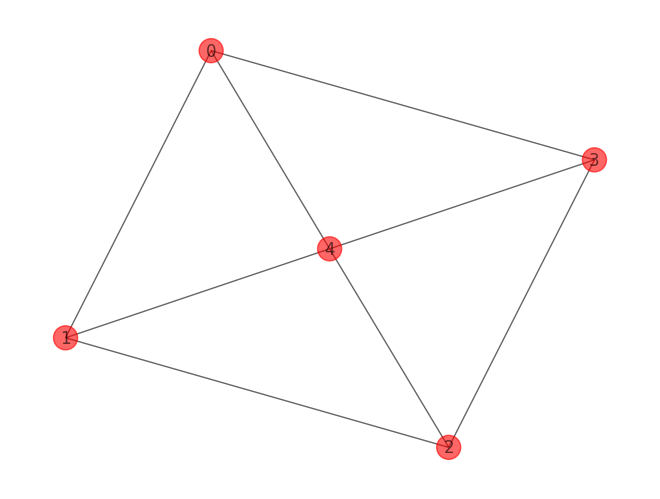

In [3]:
G = nx.Graph()
G.add_nodes_from([0,1,2,3,4])
G.add_edges_from([(0,1),(1,2),(2,3),(3,0),(0,4),(2,4),(3,4),(1,4)])

#n = 4
#p = 0.3
#H = nx.gnp_random_graph(n, p)
pos = nx.spring_layout(G)

#nx.draw(G,with_labels=True,alpha=0.6,node_size=300,pos=pos)
draw_graph(G,{},pos)

## Exact Solver

In [4]:
exactsolver = dimod.ExactSolver()

In [5]:
cut = dnx.maximum_cut(G, exactsolver)
cut

{1, 3}

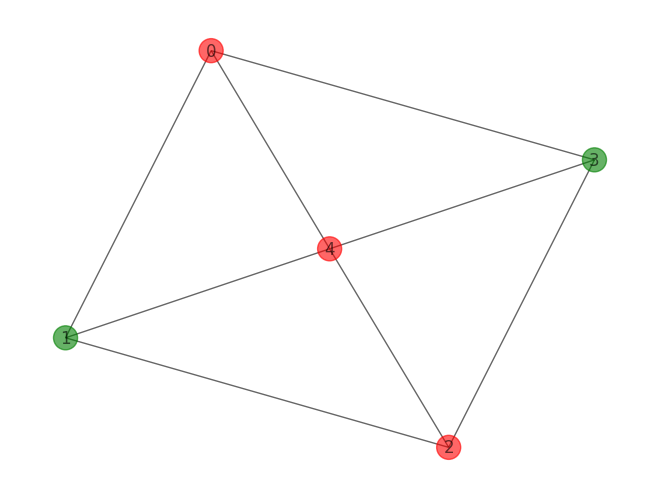

In [6]:
draw_graph(G,cut,pos)

In [7]:
print('computed max-cut: ',cut_size(G,cut))

computed max-cut:  6


## Hybrid Solver

In [8]:
from dwave.system import LeapHybridSampler

hybridsampler = LeapHybridSampler()
cut = dnx.maximum_cut(G, hybridsampler,label='max-cut')

In [9]:
cut

{1, 3}

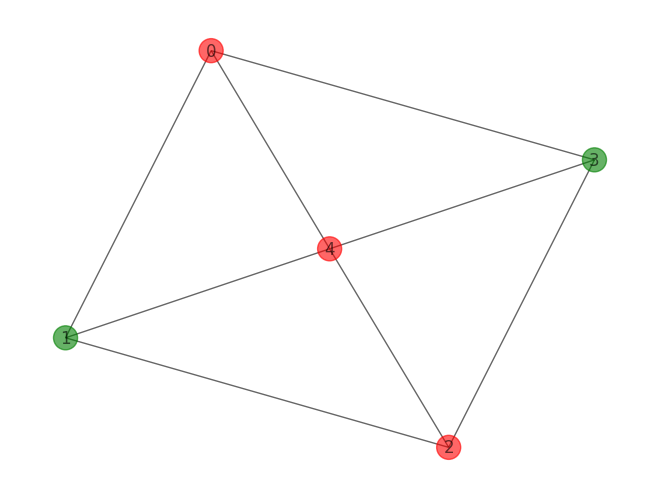

In [10]:
draw_graph(G,cut,pos)

In [11]:
print('computed max-cut: ',cut_size(G,cut))

computed max-cut:  6
